# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Halim Sajidi
- **Email:** halimsajidi14@gmail.com
- **ID Dicoding:** halimsajidi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Faktor apa saja yang paling berpengaruh terhadap penggunaan sepeda?
- Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan hari kerja vs akhir pekan?
- Pertanyaan 3: Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari?
- Pertanyaan 4: Seberapa besar dampak suhu terhadap keputusan pengguna untuk menggunakan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

## Data Wrangling

### Gathering Data

In [4]:
df_hour = pd.read_csv('hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
df_day = pd.read_csv('day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Dataset hour.csv memiliki jumlah kolom yaitu 17 kolom dan 17379 baris.
- Dataset Day.csv memiliki jumlah kolom yang sama dengan hour.csv yaitu 17 kolom dan 731 baris.

### Assessing Data

In [6]:
df_hour.info()
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [7]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


### Cleaning Data

In [10]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

## Exploratory Data Analysis (EDA)

## EDA pada dataset day.csv

In [11]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dapat dilihat pada data di atas beberapa kolom memliki value yang sudah di normalisasi seperti temp, atemp, hum,	dan juga windspeed.

### Eksplorasi rata-rata pengguna sepeda setiap harinya dalam seminggu

In [12]:
df_day_copy = df_day.copy()

# Mengubah value pada kolom 'weekday' menjadi nama hari
df_day_copy['weekday'] = df_day_copy['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
})

In [13]:
# Rata-rata pengguna sepeda setiap hari dalam seminggu
average_users_per_day = df_day_copy.groupby('weekday')['cnt'].mean()
average_users_per_day.sort_values(ascending=False).reset_index()

,weekday,cnt
0,Friday,4690.288462
1,Thursday,4667.259615
2,Saturday,4550.542857
3,Wednesday,4548.538462
4,Tuesday,4510.663462
5,Monday,4338.123810
6,Sunday,4228.828571


Dari sini dapat diketahui bahwa rata-rata pengguna paling tinggi adalah di hari jumat

### Eksplorasi rata-rata pengguna sepeda berdasarkan hari kerja dan akhir pekan

In [14]:
# Memisahkan data antara hari kerja dan akhir pekan
workingday_data = df_day_copy[df_day_copy['workingday'] == 1]  # Data hari kerja
weekend_data = df_day_copy[df_day_copy['workingday'] == 0]     # Data akhir pekan

# Menghitung rata-rata penggunaan sepeda pada hari kerja dan akhir pekan
avg_workingday = workingday_data['cnt'].mean()
avg_weekend = weekend_data['cnt'].mean()

In [15]:
print(f'rata-rata pengguna sepeda pada hari kerja: {avg_workingday:.2f}')
print(f'rata-rata pengguna sepeda pada akhir pekan: {avg_weekend:.2f}')

rata-rata pengguna sepeda pada hari kerja: 4584.82
rata-rata pengguna sepeda pada akhir pekan: 4330.17


rata-rata pengguna sepeda pada hari kerja dan akhir pekan tidak memiliki perbedaan yang signifikan

### Eksplorasi rata-rata pengguna sepeda setiap bulannya

In [16]:
# Mengubah value pada kolom 'mnth' menjadi nama bulan
df_day_copy['mnth'] = df_day_copy['mnth'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})

In [17]:
# Menghitung rata-rata penggunaan sepeda setiap bulan
avg_cnt_per_month = df_day_copy.groupby('mnth')['cnt'].mean()

# Menampilkan hasilnya
avg_cnt_per_month.sort_values(ascending=False).reset_index()

,mnth,cnt
0,Jun,5772.366667
1,Sep,5766.516667
2,Aug,5664.419355
3,Jul,5563.677419
4,May,5349.774194
5,Oct,5199.225806
6,Apr,4484.900000
7,Nov,4247.183333
8,Mar,3692.258065
9,Dec,3403.806452


Bulan dengan rata-rata pengguna sepeda tertinggi adalah bulan juni dengan rata-rata 5772-an

### Eksplorasi rata-rata pengguna sepeda berdasarkan type rentalnya (casual atau registered)

In [18]:
avg_casual = df_day['casual'].mean()
avg_registered = df_day['registered'].mean()

print(f"Rata-rata pengguna pada kolom casual: {avg_casual:.2f}")
print(f"Rata-rata pengguna pada kolom registered: {avg_registered:.2f}")


Rata-rata pengguna pada kolom casual: 848.18
Rata-rata pengguna pada kolom registered: 3656.17


Pengguna sepeda terbanyak yaitu ditype registered

## EDA pada dataset hour.csv

In [19]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Pada dataset ini pun sama seperti dataset day.csv, beberapa sudah lakukan normalisasi.

### Eksplorasi rata-rata pengguna sepeda disetiap jamnya

In [20]:
avg_cnt_per_hour = df_hour.groupby('hr')['cnt'].mean()

# Menampilkan hasilnya
avg_cnt_per_hour.sort_values(ascending=False).reset_index()

,hr,cnt
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


Jam paling sibuk terjadi pada sore hari yaitu di jam lima sore

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa saja yang paling berpengaruh terhadap penggunaan sepeda?

**Korelasi antar variabel**

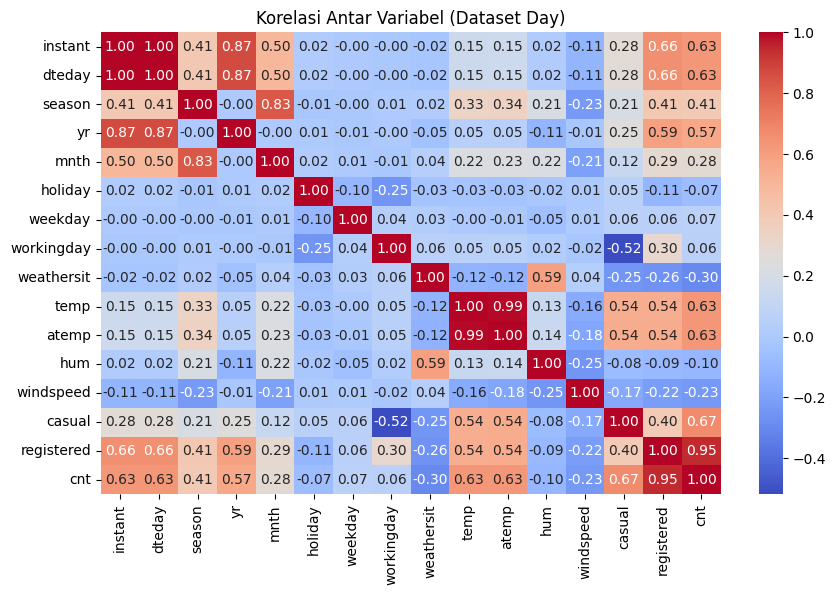

In [21]:
corr = df_day.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel (Dataset Day)')
plt.show()

In [22]:
print(corr['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


**Insight:**
- Visualisasi di atas dapat membantu kolom mana saja yang memiliki korelasi paling tinggi dengan cnt (count)
- terlihat jenis pengguna menjadi paling atas yaitu tipe registered dan casual.
- atemp (Normalized feeling temperature) pun juga bisa digunakan untuk visualisasi selanjutnya untuk melihat seberapa berpengaruh atemp ini terhadap jumlah pengguna sepeda.

Dilihati dari grafik korelasi antar variabel, dapat disimpulkan bahwa faktor yang paling berpengaruh terhadap penggunaan sepeda adalah feeling temperature, temperature, dan juga musim saat pengguna bersepeda.

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan hari kerja vs akhir pekan?

**Hari kerja vs akhir pekan**

<ipython-input-23-355510010952>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Workingday', 'Weekend'], y=[avg_workingday, avg_weekend], palette='Set2')


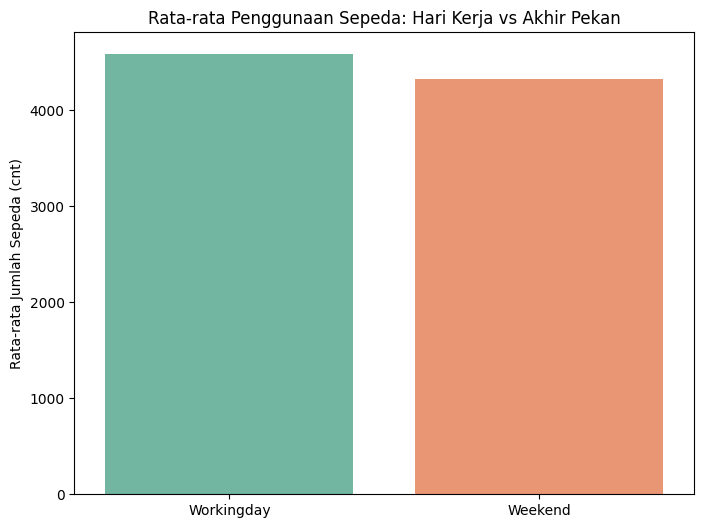

In [23]:
# Visualisasi perbandingan penggunaan sepeda
plt.figure(figsize=(8, 6))
sns.barplot(x=['Workingday', 'Weekend'], y=[avg_workingday, avg_weekend], palette='Set2')
plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.ylabel('Rata-rata Jumlah Sepeda (cnt)')
plt.show()

In [24]:
# Uji Statistik: T-test untuk membandingkan rata-rata penggunaan sepeda antara hari kerja dan akhir pekan
t_stat, p_value = stats.ttest_ind(workingday_data['cnt'], weekend_data['cnt'])

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

T-statistic: 1.6543
P-value: 0.0985


In [25]:
# Interpretasi hasil
if p_value < 0.05:
    print("Terdapat perbedaan signifikan antara penggunaan sepeda pada hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan signifikan antara penggunaan sepeda pada hari kerja dan akhir pekan.")

Tidak terdapat perbedaan signifikan antara penggunaan sepeda pada hari kerja dan akhir pekan.


**Insight:**
- Dapat dilihat darii visualisasi bahwa tidak terdapat perbedaan signifikan antara penggunaan sepeda pada hari kerja dan akhir pekan.


Berdasarkan hasil visualisasi, dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan dalam penggunaan sepeda antara hari kerja dan akhir pekan. Meskipun demikian, jumlah pengguna sepeda pada hari kerja sedikit lebih tinggi dibandingkan dengan akhir pekan.

### Pertanyaan 3: Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari?

**Pengguna sepeda berdasarkan jam dalam sehari**


In [26]:
print(df_hour['weekday'].unique())

[6 0 1 2 3 4 5]


berdasarkan unique value di atas dengan membandingkan dataset yang ada, value 6 dan 0 adalah weekend, sisanya adalah weekday, sehingga dapat disimpulkan bahwa 6 dan 0 adalah sabtu dan minggu. 1 sampai 5 adalah Senin sampai Jumat.

In [27]:
hour_data = df_hour.copy()
hour_data['weekday'].replace({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}, inplace=True)
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,0,1,1


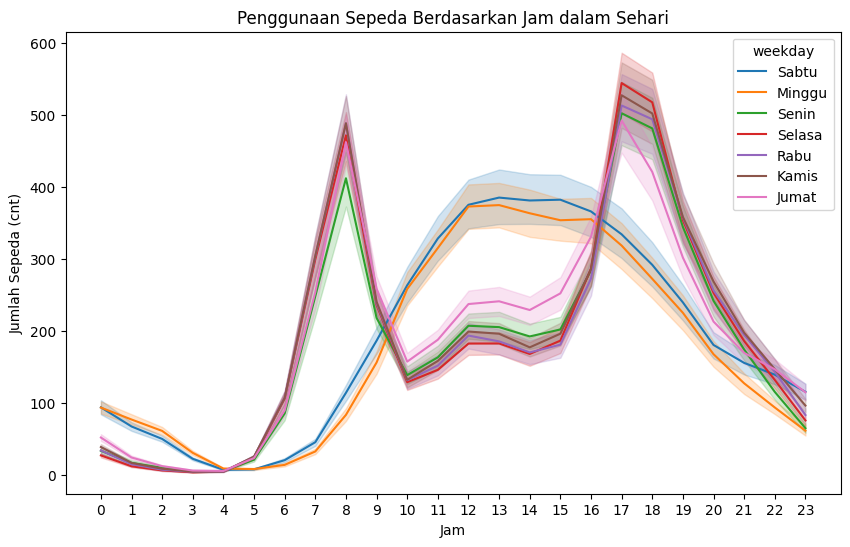

In [28]:
# Visualisasi penggunaan sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_data, x='hr', y='cnt', hue='weekday', palette='tab10')
plt.title('Penggunaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.xticks(np.arange(0, 24, 1))
plt.show()

**Insight:**
- Berdasarkan grafik dan data di atas rata-rata jumlah cnt pengguna tertinggi adalah di sore hari

Pada grafik yang telah dibuat, terlihat bahwa penggunaan sepeda tertinggi terjadi pada sore hari, khususnya antara pukul empat hingga lima sore. Selain itu, pukul delapan pagi juga menunjukkan jumlah pengguna yang cukup tinggi, menandakan adanya dua puncak waktu penggunaan sepeda yang signifikan.

### Pertanyaan 4: Seberapa besar dampak suhu terhadap keputusan pengguna untuk menggunakan sepeda?

**Clustering (Binning)**

In [29]:
# Definisikan batas untuk setiap kategori suhu
bins = [df_hour['atemp'].min(), 0.25, 0.75, df_hour['atemp'].max()]
labels = ['Dingin', 'Sedang', 'Panas']

# Buat kolom baru 'temp_category' berdasarkan kategori suhu
df_hour['temp_category'] = pd.cut(df_hour['atemp'], bins=bins, labels=labels, include_lowest=True)

# Tampilkan DataFrame dengan kolom 'temp_category'
df_hour[['atemp', 'temp_category']]

,atemp,temp_category
0,0.2879,Sedang
1,0.2727,Sedang
2,0.2727,Sedang
3,0.2879,Sedang
4,0.2879,Sedang
...,...,...
17374,0.2576,Sedang
17375,0.2576,Sedang
17376,0.2576,Sedang
17377,0.2727,Sedang


- Membagi kolom atemp (yang mewakili suhu aktual di dataset) menjadi tiga kategori suhu: Dingin, Sedang, dan Panas.
- bins: Berfungsi untuk menetapkan batas untuk setiap kategori. Nilai pertama adalah suhu terendah (df_hour['atemp'].min()) dan yang terakhir adalah suhu tertinggi (df_hour['atemp'].max()). Suhu di antara keduanya dibagi menjadi dua batas (0.25 dan 0.75), di mana:
  - Suhu < 0.25 dianggap Dingin.
  - Suhu antara 0.25 dan 0.75 dianggap Sedang.
  - Suhu > 0.75 dianggap Panas.
- labels: Memberikan label untuk kategori tersebut, yaitu Dingin, Sedang, dan Panas.



In [30]:
# Analisis penggunaan sepeda berdasarkan kategori suhu
temp_grouped = df_hour.groupby('temp_category')['cnt'].mean().reset_index()

<ipython-input-30-56a90c541629>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_grouped = df_hour.groupby('temp_category')['cnt'].mean().reset_index()


In [31]:
temp_grouped

,temp_category,cnt
0,Dingin,76.246926
1,Sedang,198.835438
2,Panas,308.463415


<ipython-input-32-6030ba0f6e3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_category', y='cnt', data=temp_grouped, palette='viridis')


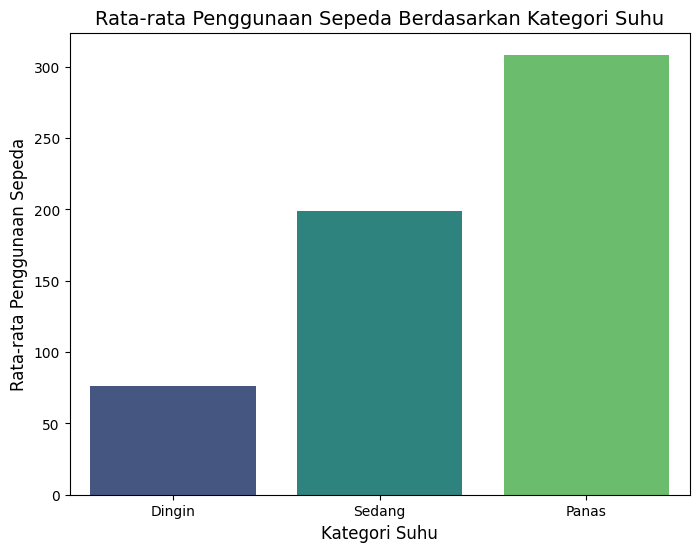

In [32]:
# Membuat grafik
plt.figure(figsize=(8, 6))
sns.barplot(x='temp_category', y='cnt', data=temp_grouped, palette='viridis')

# Menambahkan judul dan label
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Kategori Suhu', fontsize=14)
plt.xlabel('Kategori Suhu', fontsize=12)
plt.ylabel('Rata-rata Penggunaan Sepeda', fontsize=12)

# Tampilkan grafik
plt.show()

**Insight:**
- Berdasarkan grafik di atas rata-rata penggunaan sepeda tertinggi terjadi pada kategori suhu Panas.

Dengan menggunakan metode **clustering binning**, hasil menunjukkan adanya perbedaan signifikan dalam jumlah pengguna sepeda berdasarkan suhu. Pengguna cenderung lebih banyak menggunakan sepeda pada suhu yang lebih panas, menandakan preferensi terhadap kondisi cuaca yang hangat.

## Conclusion

- **Conclution pertanyaan 1:** Berdasarkan analisis dan visualisasi data, dapat disimpulkan beberapa faktor utama yang mempengaruhi penggunaan sepeda. Faktor yang paling berpengaruh adalah feeling temperature, temperature, dan musim, yang menunjukkan bahwa kondisi cuaca memainkan peran penting dalam keputusan pengguna untuk bersepeda.
- **Conclution pertanyaan 2:** Meskipun tidak terdapat perbedaan signifikan antara penggunaan sepeda pada hari kerja dan akhir pekan, jumlah pengguna cenderung sedikit lebih tinggi pada hari kerja.
- **Conclution pertanyaan 3:** Penggunaan sepeda mencapai puncaknya pada dua waktu utama, yaitu pukul delapan pagi dan antara pukul empat hingga lima sore. Hal ini bisa terjadi dikarenakan diwaktu tersebut adalah waktu berangkat dan pulang kerja.
- **Conclution pertanyaan 4:** Analisis menggunakan clustering binning mengonfirmasi bahwa pengguna lebih cenderung bersepeda saat suhu lebih panas, mengindikasikan preferensi terhadap cuaca yang lebih hangat.

In [33]:
pip freeze > requirements.txt

In [34]:
df_hour.to_csv('dataset.csv', index=False)